In [19]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt 
import cmath as math
import sys
from sklearn import metrics
from scipy.spatial.distance import cdist

In [23]:
batting=pd.read_csv("./../Data/stats_batting_2.csv")
bowling=pd.read_csv("./../Data/stats_bowling_1.csv")

# batting.head()
bowling.head()

,player_name,runs_conceded,wickets_taken,overs_bowled,bowling_average,economy_rate,bowling_strike_rate
0,A Ashish Reddy,396,18,43.4,22.0,9.12,14.47
1,A Chandila,242,11,39.0,22.0,6.21,21.27
2,A Choudhary,144,5,16.5,28.8,8.73,19.80
3,A Dananjaya,47,0,4.0,NaN,11.75,NaN
4,A Flintoff,105,2,11.0,52.5,9.55,33.00


In [27]:
batting.dropna(inplace=True)
bowling.dropna(inplace=True)

In [28]:
#we thought of taking only batting avg and strike rate for clustering but
#the guy who faced 1 ball and hit 1 run also belongs to top batsmans cluster so we are considering all
FEATURES_COL=["runs_scored","balls_faced","times_out","batting_avg","strike_rate"]
FEATURES_COL_BOWL=["runs_conceded","wickets_taken","overs_bowled","bowling_average","economy_rate","bowling_strike_rate"]

In [29]:
batting[FEATURES_COL] = batting[FEATURES_COL].astype(float)
bowling[FEATURES_COL_BOWL]=bowling[FEATURES_COL_BOWL].astype(float)

In [30]:
x=batting.iloc[:,[1,2,3,4,5]].values
y_set=batting.iloc[:,[0]].values

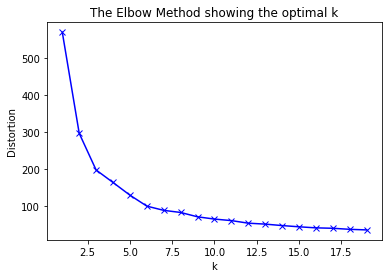

<Figure size 432x288 with 0 Axes>

In [34]:
# k means determine k
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(x)
    kmeanModel.fit(x)
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
plt.savefig("batsman_elbow.png")
 

In [32]:
x=bowling.iloc[:,[1,2,3,4,5,6]].values
y_set=bowling.iloc[:,[0]].values

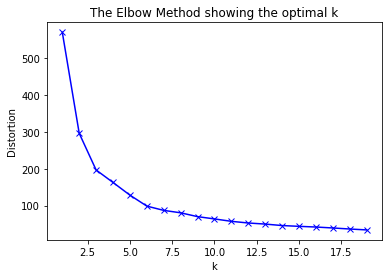

In [33]:
# k means determine k
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(x)
    kmeanModel.fit(x)
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
